In [43]:
import datetime as dt
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Betas' estimation for Apple(AAPL), Netflix(NFLX), Alphabet(GOOGL) and Paypal(PYPL).

In [71]:
#Tickers for Apple, Netflix, Google, Paypal and the S&P500 respectively. 
stocks_tickers = ['AAPL','NFLX','GOOGL','PYPL','^GSPC']

In [72]:
# Setting the period range
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [70]:
# Fetching the data using the pandas datareader library
data = pdr.get_data_yahoo(stocks_tickers,start,end,interval='m')

In [47]:
data.head()

Attributes  Adj Close                                                 \
Symbols          AAPL        NFLX      GOOGL       PYPL        ^GSPC   
Date                                                                   
2016-01-01  22.346199   91.839996  38.067501  36.139999  1940.239990   
2016-02-01  22.196980   93.410004  35.861000  38.139999  1932.229980   
2016-03-01  25.156443  102.230003  38.145000  38.599998  2059.739990   
2016-04-01  21.636524   90.029999  35.394001  39.180000  2065.300049   
2016-05-01  23.049110  102.570000  37.442501  37.790001  2096.949951   

Attributes      Close                                                 ...  \
Symbols          AAPL        NFLX      GOOGL       PYPL        ^GSPC  ...   
Date                                                                  ...   
2016-01-01  24.334999   91.839996  38.067501  36.139999  1940.239990  ...   
2016-02-01  24.172501   93.410004  35.861000  38.139999  1932.229980  ...   
2016-03-01  27.247499  102.230003  38.145000  38.599998  2059.739990  ...   
2016-04-01  23.434999   90.029999  35.394001  39.180000  2065.300049  ...   
2016-05-01  24.965000  102.570000  37.442501  37.790001  2096.949951  ...   

Attributes     Open                                                 \
Symbols        AAPL        NFLX      GOOGL       PYPL        ^GSPC   
Date                                                                 
2016-01-01  25.6525  109.000000  38.110001  35.130001  2038.199951   
2016-02-01  24.1175   91.790001  38.563000  35.650002  1936.939941   
2016-03-01  24.4125   94.580002  36.064999  38.520000  1937.089966   
2016-04-01  27.1950  102.930000  37.858002  38.509998  2056.620117   
2016-05-01  23.4925   90.410004  35.596001  39.070000  2067.169922   

Attributes        Volume                                                        
Symbols             AAPL         NFLX         GOOGL         PYPL         ^GSPC  
Date                                                                            
2016-01-01  5.087392e+09  488193200.0  1.039984e+09  205399700.0  9.240977e+10  
2016-02-01  3.243450e+09  389268900.0  1.352946e+09  248604000.0  9.304956e+10  
2016-03-01  2.984198e+09  311333700.0  8.533140e+08  189313600.0  9.263942e+10  
2016-04-01  3.489535e+09  340174300.0  9.332280e+08  154169300.0  8.112499e+10  
2016-05-01  3.602686e+09  264997900.0  6.820460e+08  176555100.0  7.888360e+10  

[5 rows x 30 columns]

In [48]:
##Getting the Adj. Close price for all the stocks
data = data['Adj Close']

In [49]:
#We use logs to turn closing prices into % changes returns
returns = np.log(data/data.shift())

In [50]:
#We drop the first row 
returns = returns.dropna()
returns

Symbols,AAPL,NFLX,GOOGL,PYPL,^GSPC
Date,,,,,
2016-02-01,-0.006700,0.016951,-0.059711,0.053863,-0.004137
2016-03-01,0.125158,0.090227,0.061744,0.011989,0.063905
2016-04-01,-0.150731,-0.127082,-0.074852,0.014914,0.002696
2016-05-01,0.063244,0.130403,0.056264,-0.036122,0.015208
2016-06-01,-0.037527,-0.114425,-0.062428,-0.034458,0.000911
...,...,...,...,...,...
2022-04-01,-0.102178,-0.676915,-0.197801,-0.274027,-0.092068
2022-05-01,-0.057505,0.036518,-0.003050,-0.031422,0.000053
2022-06-01,-0.083469,-0.121392,-0.043100,-0.198912,-0.087652


### Methods to estimate the beta of a stock

There are two main methods to calculate the beta of a stock.

1.Covariance between returns of a stock i $(R_i)$ and the index $(R_m)$ divided by the variance $(Var_m)$ of the index. $$\beta=\frac{Covariance(R_i,R_m)}{Var_m}$$

2.OLS of stock returns $R_i$ on market returns ${R_m}$. We estimate the model of the form: $$Y_i = \beta_0 + \beta_1X_i + \epsilon_i$$

where ${\beta_1}$ is the estimated beta of the stock and therefore the coefficient we're interested in.


Covariance method

In [51]:
#We generate the covariance matrix

returns.cov()

Symbols,AAPL,NFLX,GOOGL,PYPL,^GSPC
Symbols,,,,,
AAPL,0.006881,0.004296,0.002922,0.003974,0.002443
NFLX,0.004296,0.016821,0.004304,0.007025,0.002782
GOOGL,0.002922,0.004304,0.004289,0.003420,0.002177
PYPL,0.003974,0.007025,0.003420,0.010520,0.002810
^GSPC,0.002443,0.002782,0.002177,0.002810,0.001998


In [52]:
covariance = returns.cov()

In [53]:
#Calculate the variance of the S&P 500

variance_index = returns["^GSPC"].var()

In [54]:
#We can now calculate the beta for each stock

betas = [covariance.loc[ticker,'^GSPC'] / variance_index for ticker in stocks_tickers[:-1]]

In [55]:
print('Betas')
for stock,beta in zip(stocks_tickers,betas):
    print(f'{stock}: {beta}')

Betas
AAPL: 1.2227062959573423
NFLX: 1.392264558223061
GOOGL: 1.0897487429026074
PYPL: 1.4065270981161442


Plotting the returns and fit a line

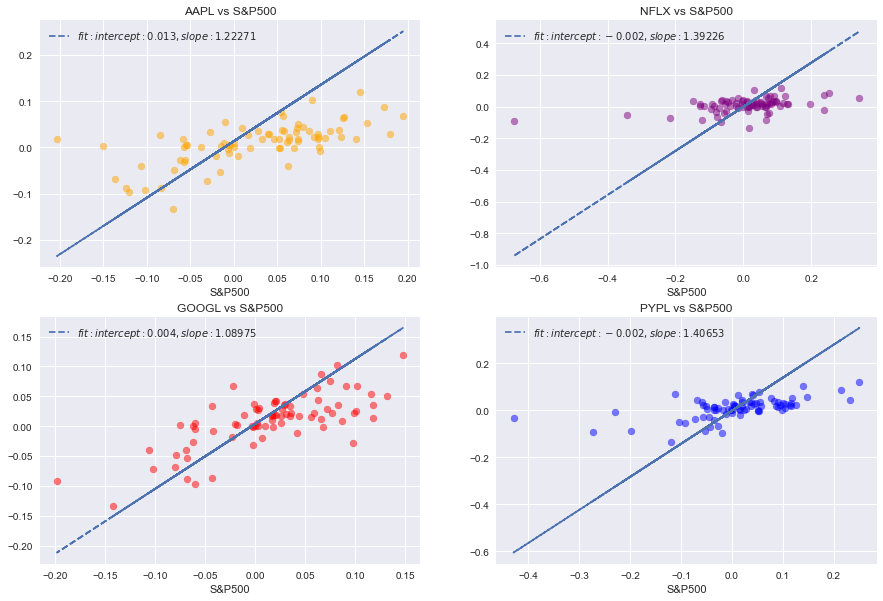

In [68]:
#Scatter plots for each stock returns against the S&P 500 and fit a line

fig, axes = plt.subplots(2,2, figsize=(15,10))

plt.style.use(['seaborn'])

stocks = np.array(stocks_tickers[:-1]).reshape(2,2)
colors = np.array(['orange','purple','red','blue']).reshape(2,2)

for i in range(2):
    for j in range(2):
        
        #Curve estimation
        curve = np.polyfit(returns['^GSPC'],returns[stocks[i,j]],1)
        poly = np.poly1d(curve)
                
        #Plotting 
        axes[i,j].scatter(returns[stocks[i,j]],returns['^GSPC'], color=colors[i,j],alpha=0.5)
        axes[i,j].plot(returns[stocks[i,j]],poly(returns[stocks[i,j]]),label=f'$fit:intercept:{round(curve[1],3)},slope:{round(curve[0],5)}$',linestyle='--')
        axes[i,j].set_title(f'{stocks[i,j]} vs S&P500')
        axes[i,j].set_xlabel('S&P500')
        axes[i,j].legend()
        
        

OLS method

In [69]:
betas_regression = []


#We turn the pandas series into numpy arrays.

for stock in stocks_tickers[:-1]:
    X = returns['^GSPC'].to_numpy().reshape(-1,1)
    Y = returns[stock].to_numpy().reshape(-1,1)

    linear_regression = LinearRegression()
    linear_regression.fit(X,Y)

    betas_regression.append(linear_regression.coef_[0,0])
    
print("Betas with regression:")   
for stock,beta in zip(stocks_tickers[:-1],betas_regression):
    print(f'{stock}:{beta}')

Betas with regression:
AAPL:1.2227062959573431
NFLX:1.392264558223062
GOOGL:1.0897487429026076
PYPL:1.4065270981161448
